In [1]:
# отключим лишние предупреждения 
import warnings
warnings.simplefilter('ignore')

# для отображения графиков
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 

#увеличим размер графиков по сравнению со страндратным
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd

Создадим `dataframe` с данными. При создании оставим только строки, которые не содержат пропущенных значений.

In [45]:
df = pd.read_csv('../../data/fb_m_data.csv').dropna()
print(df.shape)

(761, 15)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 760
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                761 non-null    int64  
 1   reporting_start      761 non-null    object 
 2   reporting_end        761 non-null    object 
 3   campaign_id          761 non-null    object 
 4   fb_campaign_id       761 non-null    object 
 5   age                  761 non-null    object 
 6   gender               761 non-null    object 
 7   interest1            761 non-null    int64  
 8   interest2            761 non-null    int64  
 9   interest3            761 non-null    int64  
 10  impressions          761 non-null    float64
 11  clicks               761 non-null    int64  
 12  spent                761 non-null    float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
memor

Всего в таблице 761 объект и 15 признаков для них. Посмотрим на несколько первых записей c помощью `head`. Оставим только те признаки, которые мы будем в дальнейшем использовать.

In [47]:
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [48]:
useful_cols = ['ad_id', 'campaign_id', 'fb_campaign_id', 'age', 
               'gender', 'interest1', 'interest2',
               'interest3', 'clicks', 'spent', 'total_conversion',
               'approved_conversion'
              ]
df[useful_cols].head()

,ad_id,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,clicks,spent,total_conversion,approved_conversion
0,708746,916,103916,30-34,M,15,17,17,1,1.43,2.0,1.0
1,708749,916,103917,30-34,M,16,19,21,2,1.82,2.0,0.0
2,708771,916,103920,30-34,M,20,25,22,0,0.00,1.0,0.0
3,708815,916,103928,30-34,M,28,32,32,1,1.25,1.0,0.0
4,708818,916,103928,30-34,M,28,33,32,1,1.29,1.0,1.0


Прежде чем мы перейдем к изучению методов библиотек `seaborn` и `plotly`, попробуем самый простой и зачастую удобный способ визуализировать данные из `dataframe` — это воспользоваться функцией `plot`. Посчитаем среднее время, которое пользователь потратил просматривая рекламные сообщения в каждой из кампаний. 

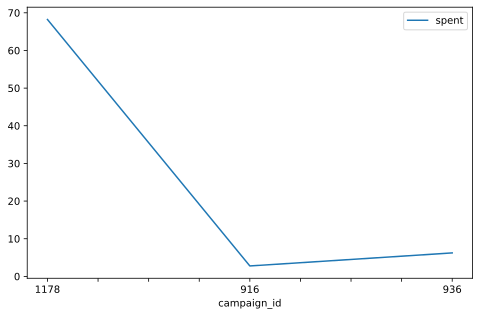

In [30]:
df[['campaign_id', 'spent']].groupby('campaign_id').mean().plot()

Но получившийся график не очень наглядный, сменим тип графика

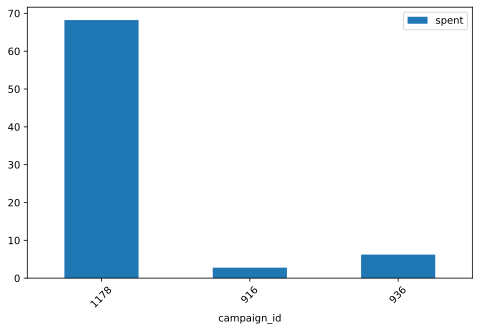

In [32]:
df[['campaign_id', 'spent']].groupby('campaign_id').mean().plot(kind='bar', rot=45)

Посмотрим теперь на библиотеку для визуализации seaborn. 

Познакомимся с таким типом графиков как pair plot. Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки.

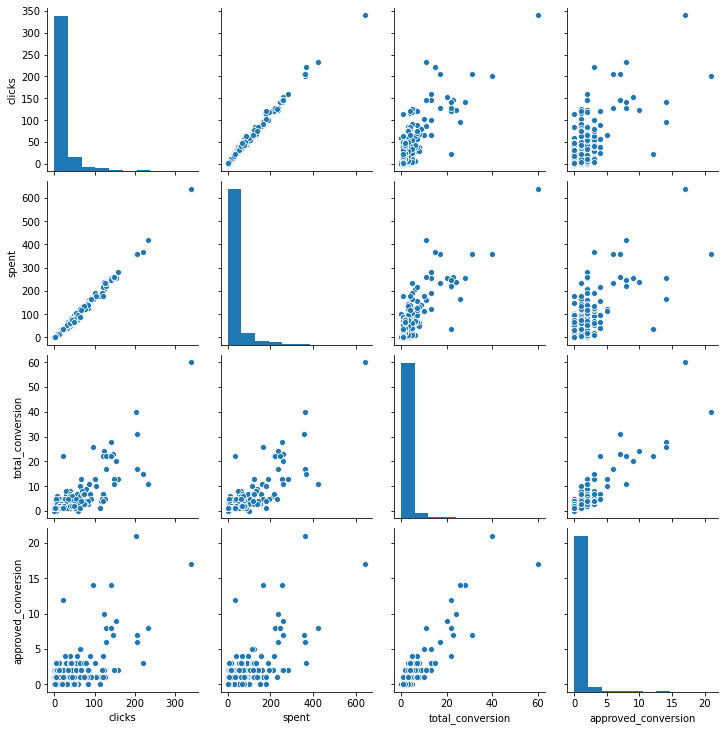

In [37]:
# c svg pairplot браузер начинает тормозить
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['clicks', 'spent', 'total_conversion', 
                 'approved_conversion']])

Также с помощью `seaborn` можно построить распределение, для примера посмотрим на распределение потраченного времени `spent`. Для этого построим __`distplot`__. 

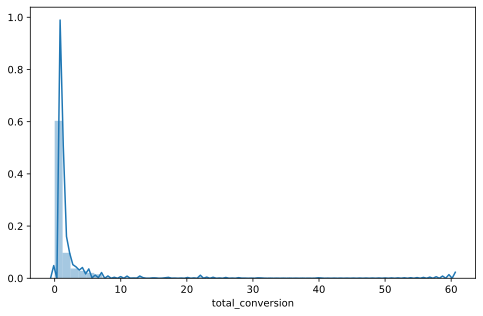

In [39]:
%config InlineBackend.figure_format = 'svg' 
sns.distplot(df['total_conversion'])

Для того чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и `joint_plot` – это гибрид `scatter plot` и `histogram`. 

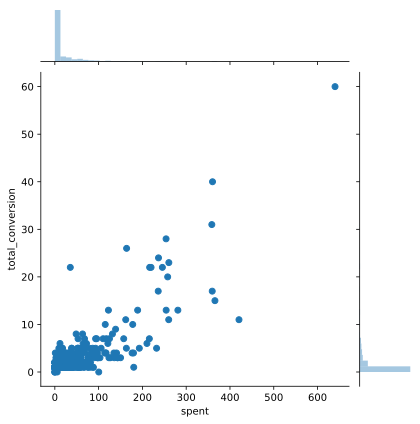

In [40]:
sns.jointplot(x='spent', y='total_conversion', data=df, kind='scatter');

И еще один тип графиков (последний из тех, которые мы рассмотрим в этой статье) - это `heat map`. Heat map позволяет посмотреть на распределение какого-то численного признака по двум категориальным.

In [43]:
age_gender_conversion = df.pivot_table(
                        index='gender', 
                        columns='age', 
                        values='total_conversion', 
                        aggfunc=sum).fillna(0).applymap(float)

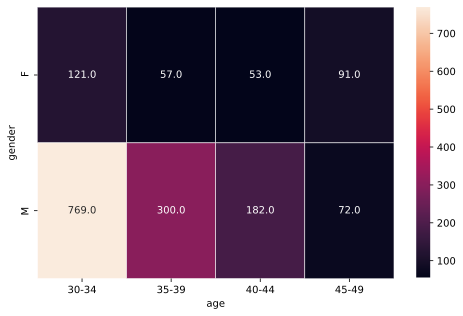

In [44]:
sns.heatmap(age_gender_conversion, annot=True, fmt=".1f", linewidths=.5);